# K Nearest Neighbors Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('KNN_Project_Data.csv')

In [2]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
XVPM            1000 non-null float64
GWYH            1000 non-null float64
TRAT            1000 non-null float64
TLLZ            1000 non-null float64
IGGA            1000 non-null float64
HYKR            1000 non-null float64
EDFS            1000 non-null float64
GUUB            1000 non-null float64
MGJM            1000 non-null float64
JHZC            1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 86.0 KB


/home/kamil/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/kamil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/kamil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/kamil/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


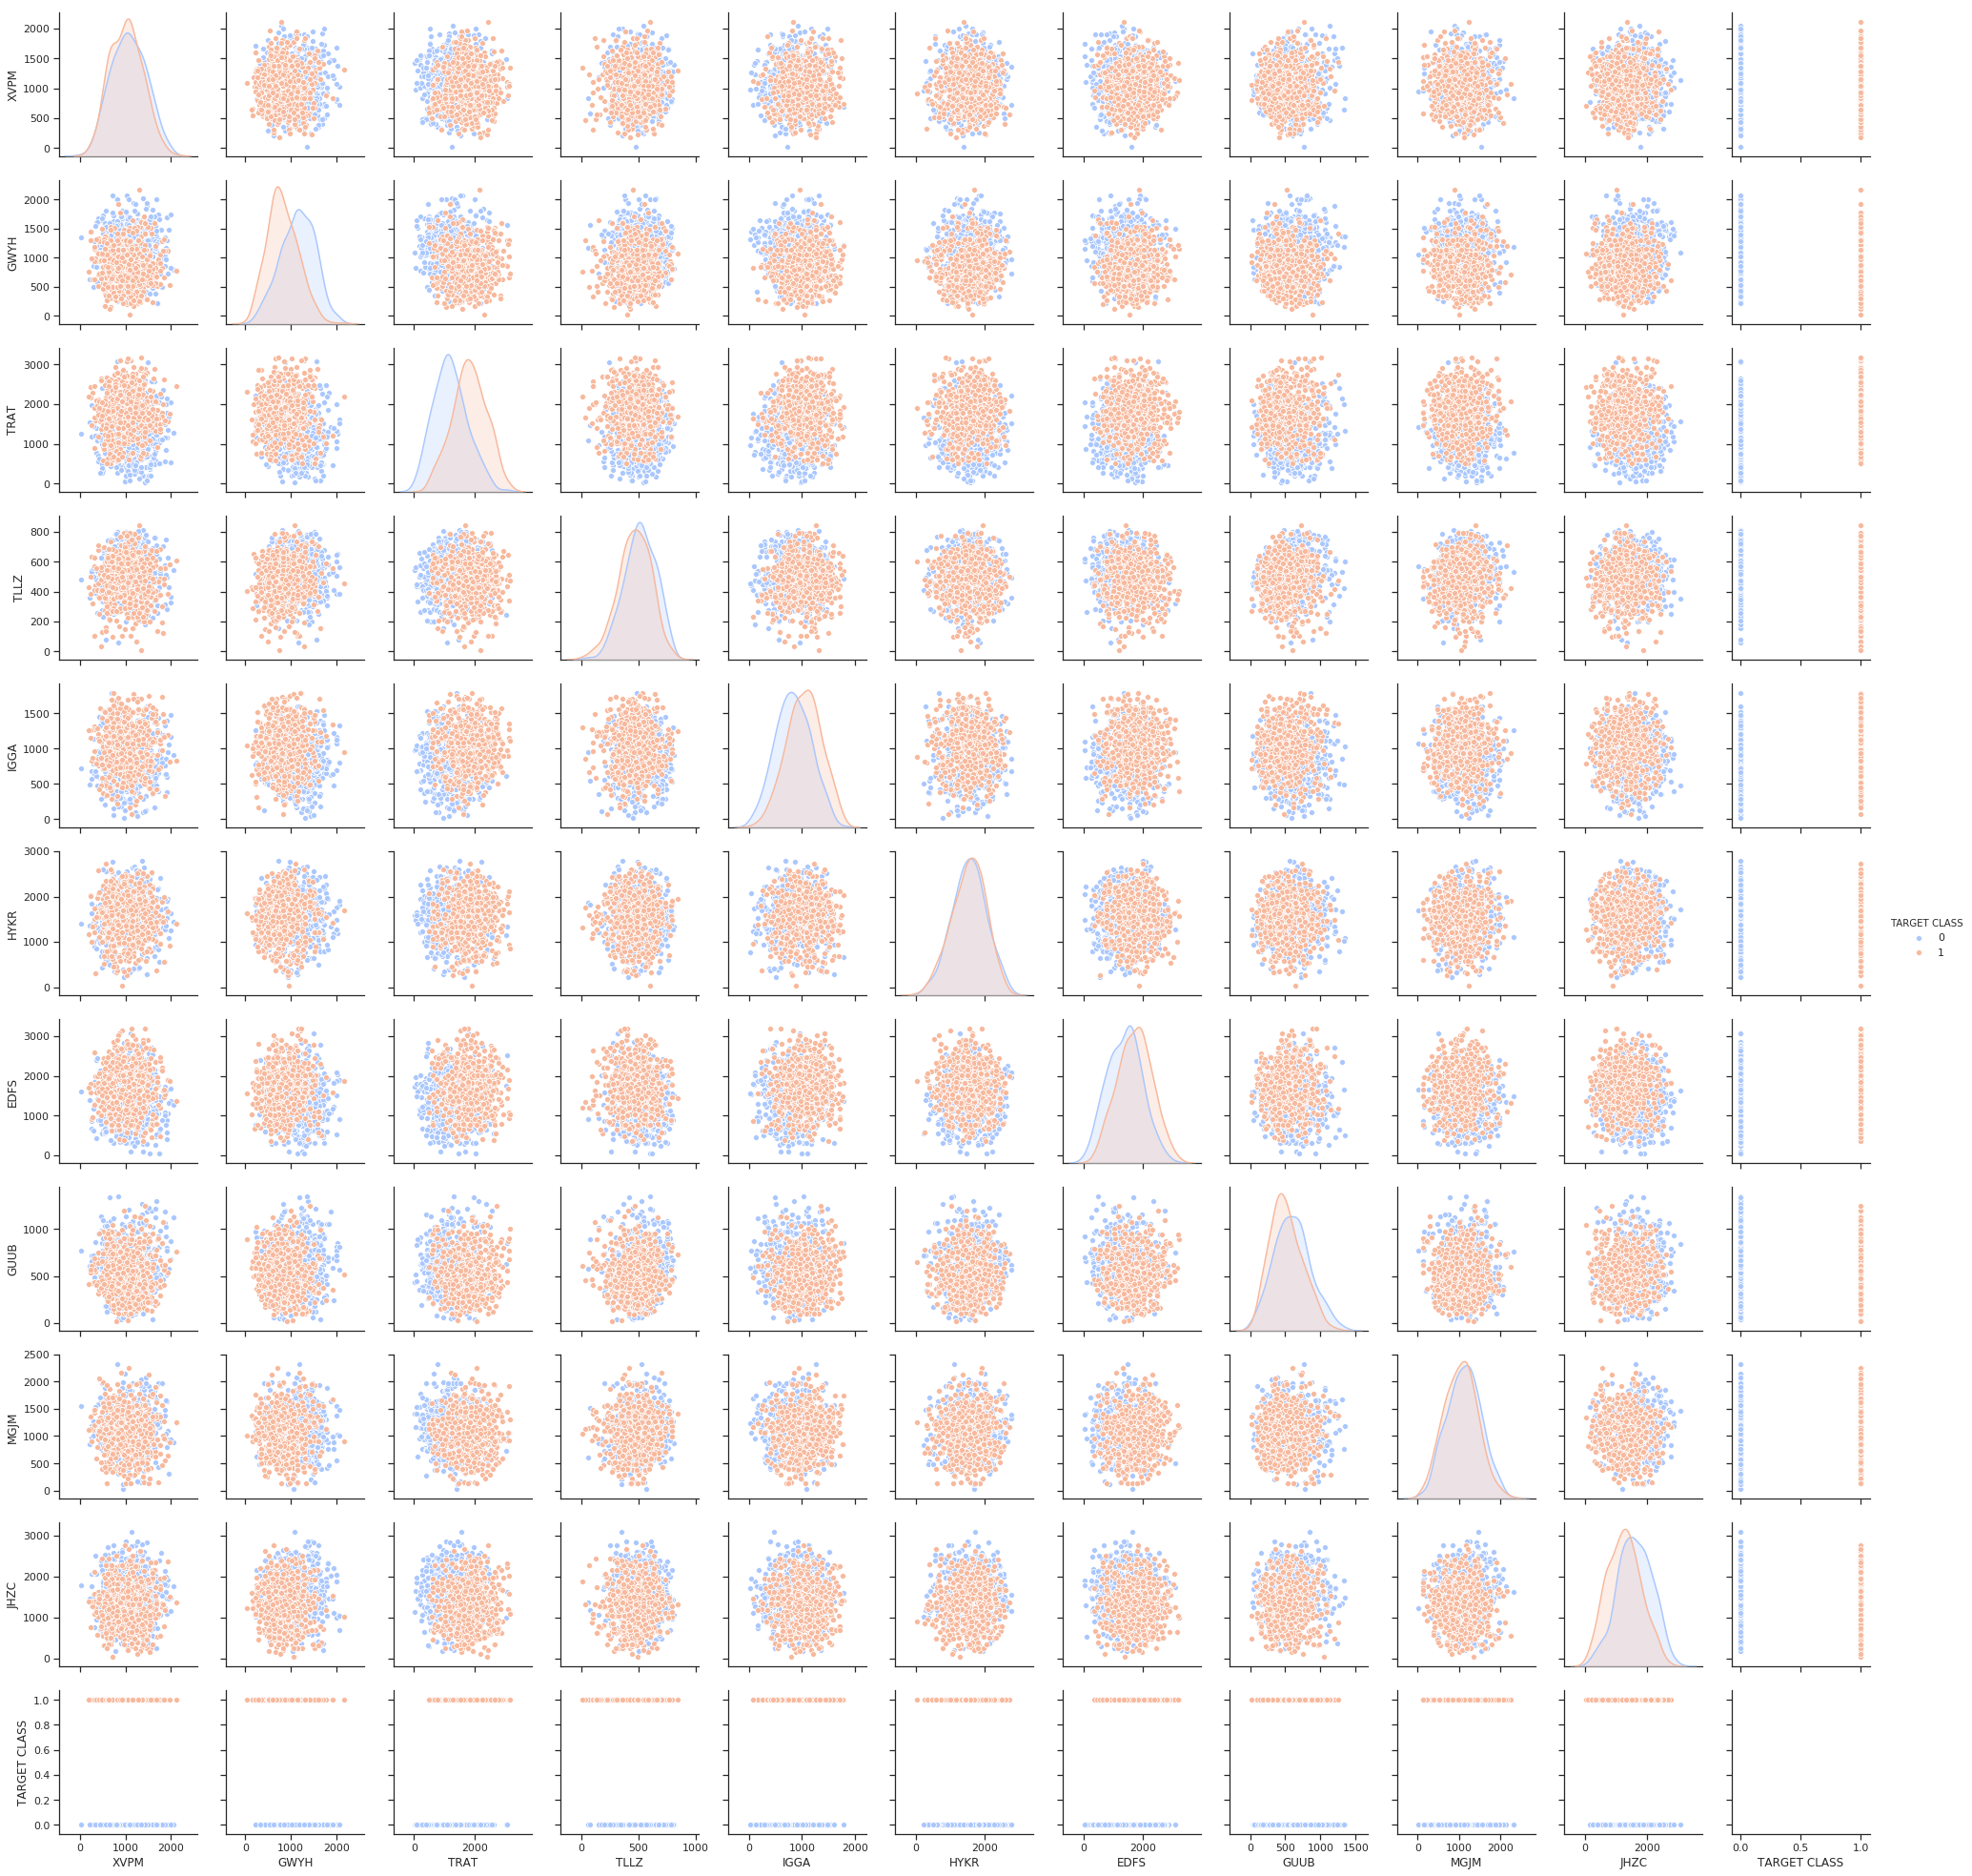

In [4]:
sns.set(style="ticks")
sns.pairplot(df, hue='TARGET CLASS', palette='coolwarm')

# Standardize the Variables

Import StandardScaler from Scikit learn.

In [5]:
from sklearn.preprocessing import StandardScaler

Create a StandardScaler() object called scaler.


In [6]:
scaler = StandardScaler()

Fit scaler to the features.

In [7]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

Use the .transform() method to transform the features to a scaled version.

In [9]:
scaled_feature = scaler.transform(df.drop('TARGET CLASS', axis=1))

Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.

In [10]:
X_features = pd.DataFrame(scaled_feature, columns=df.columns[:-1])
X_features.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


# Train Test Split

Use train_test_split to split your data into a training set and a testing set.

In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X = X_features
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

# Using KNN

- Import KNeighborsClassifier from scikit learn.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

- Create a KNN model instance with n_neighbors=1

In [18]:
knn = KNeighborsClassifier(n_neighbors=1)

- Fit this KNN model to the training data.

In [20]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

# Predictions and Evaluations

- Use the predict method to predict values using your KNN model and X_test.

In [21]:
y_pred = knn.predict(X_test)

- Create a confusion matrix and classification report

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print('Classification report:',classification_report(y_test,y_pred))
print('Confusion matrix:', confusion_matrix(y_test,y_pred))

Classification report:               precision    recall  f1-score   support

           0       0.70      0.75      0.73       146
           1       0.75      0.69      0.72       154

   micro avg       0.72      0.72      0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300

Confusion matrix: [[110  36]
 [ 47 107]]


# Choosing a K Value

Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.

In [27]:
error_rate =[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred_i = knn.predict(X_test)
    error_rate.append(np.mean(y_pred_i != y_test))

Now create the following plot using the information from your for loop.

Text(0, 0.5, 'Error rate')

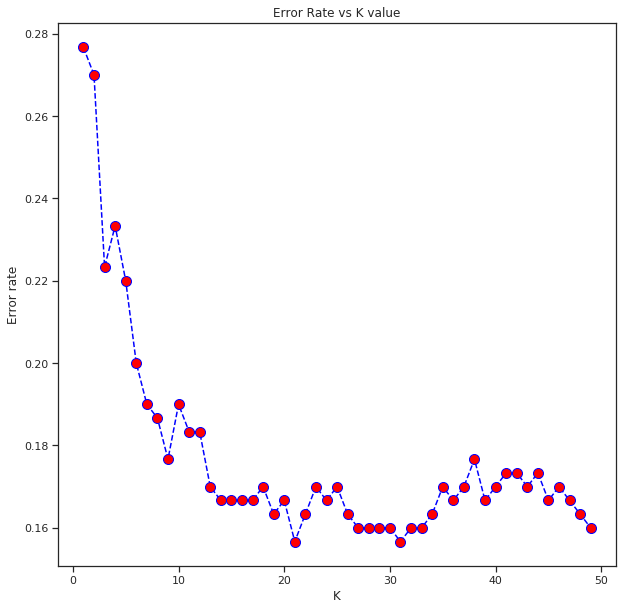

In [33]:
plt.figure(figsize=(10,10))
plt.plot(range(1,50), error_rate, color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error rate')

# Retrain with new K Value

Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.

In [35]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print (confusion_matrix(y_test,y_pred))
print ('\n')
print (classification_report(y_test,y_pred))

[[127  19]
 [ 29 125]]


              precision    recall  f1-score   support

           0       0.81      0.87      0.84       146
           1       0.87      0.81      0.84       154

   micro avg       0.84      0.84      0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

